In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_1 = pd.read_csv('../DataSets/Human Activity Recognition with Smartphones.csv')
df_2 = sns.load_dataset('titanic')

In [8]:
df_1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
df_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df_1["subject"]

0        2
1        2
2        2
3        2
4        2
        ..
2942    24
2943    24
2944    24
2945    24
2946    24
Name: subject, Length: 2947, dtype: int64

In [11]:
# The categorical feature ‘subject’ is removed to focus on numerical feature selection, while retaining the categorical target ‘activity’.
df_1.drop(columns=['subject'] , inplace=True)

In [18]:
df_1["Activity"].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [19]:
print(df_1.shape)

(2947, 562)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
# Separating features and target variable

x = df_1.drop(columns=['Activity'])
y = df_1['Activity']


# Encode target labels so that they are in numerical format 

le = LabelEncoder()
y = le.fit_transform(y)


# Splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

`Note :` **Before applying feature selection it is important to split the dataset into training and testing sets to avoid data leakage. Feature selection should be performed only on the training set, and then the selected features should be applied to the test set.**

In [22]:
print(x_train.shape)
print(x_test.shape)

(2357, 561)
(590, 561)


#### Applying Logistic Regression 

In [24]:
# initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)     # Increased max_iter to ensure convergence

# Fitting the model on training data
log_reg.fit(x_train, y_train)

# Making predictions on the test data
y_pred = log_reg.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression model: {accuracy * 100:.2f}%')

Accuracy of Logistic Regression model: 99.49%


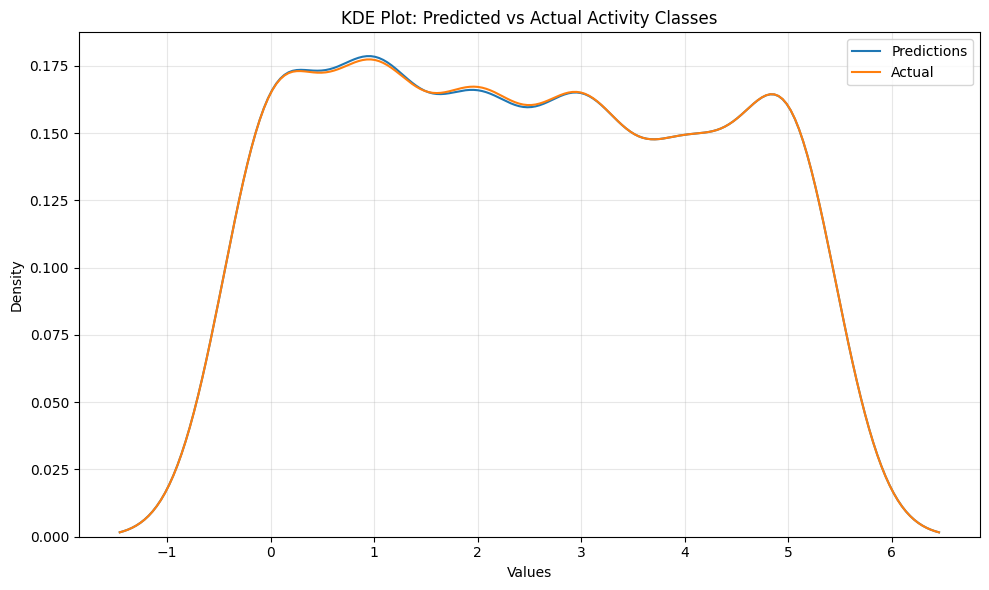

In [ ]:
# Ploting 
plt.figure(figsize=(10, 6))

sns.kdeplot(y_pred )
sns.kdeplot(y_test )


plt.legend(['Predictions', 'Actual'], loc='upper right')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot: Predicted vs Actual Activity Classes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Deleting Duplicate Features**

In [ ]:
# finding duplicate features

duplicate_features = x_train.columns[x_train.T.duplicated()]        # .T is used to transpose the DataFrame so that we can check for duplicate rows (features in original DataFrame)
# here .duplicated() returns a boolean Series indicating whether each row is a duplicate of a previous row and we use this boolean Series to index the transposed DataFrame's columns to get the names of the duplicate features. 

print(f'Duplicate features: {list(duplicate_features)}')

In [35]:
# Removing duplicate features from training and testing sets

# method 1
# x_train.drop(columns=duplicate_features, inplace=True)

# method 2
df_1 = df_1.loc[:, ~df_1.T.duplicated(keep='first')]  # keep='first' keeps the first occurrence and removes subsequent duplicates

In [36]:
df_1.shape

(2947, 541)

## **Variance Threshold**